## 범주형 독립변수

In [2]:
import statsmodels.api as sm
import datetime
from calendar import isleap

def convert_partial_year(number):
    "연 단위 숫자에서 날짜를 계산하는 코드"
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem = sm.datasets.get_rdataset("nottem").data
df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


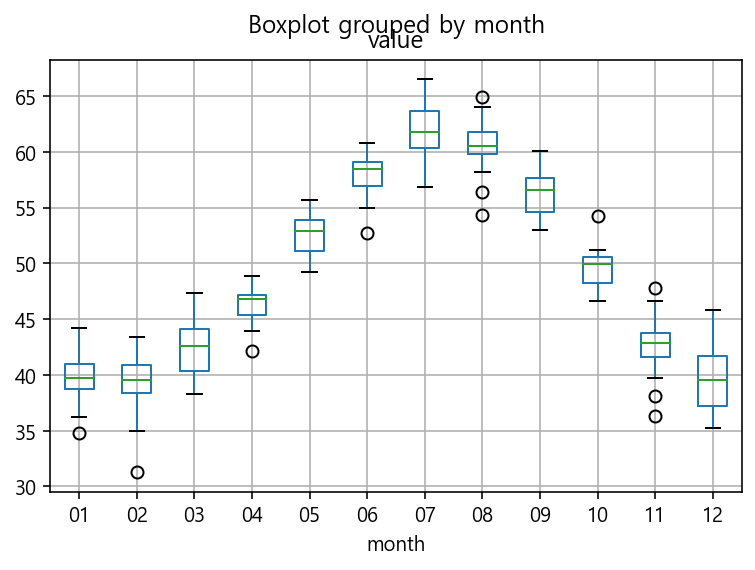

In [4]:
df_nottem.boxplot('value', 'month')
plt.show()

## 풀랭크방식

풀랭크(full-rank)방식에서는 더미변수의 값을 원핫인코딩(one-hot-encoding)방식으로 지정한다.

**별도의 상수항은 포함하지 않는다.**

In [6]:
model = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          2.96e-125
Time:                        11:37:58   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

## 축소랭크 방식

축소랭크(reduced-rank)방식은 특정한 하나의 범주값을 기준값(reference, baseline)으로 하고 기준값에 대응하는 더미변수의 가중치를 1로 놓는다.

**상수항을 포함해야하므로 formula에 +0은 제외한다.**

In [8]:
model = sm.OLS.from_formula("value ~ C(month)", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          2.96e-125
Time:                        11:39:02   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.

축소랭크 방식의 결과 intercept(y절편)이 1월의 범주데이터가 기준이 되었다.

2월, 3월 등등의 coef값은 기준값이 되는 1월에 비해 얼마나 높냐 낮냐를 의미

(P > |t|)의 의미는 해당 독립변수의 coef 값이 사실은 0일 것이라는 귀무가설에 대한 유의확률

## 보스턴 집값 데이터 범주형 변수

보스턴 집값 데이터는 CHAS라는 범주형 변수가 있고 0과 1이라는 두개의 값을 가진다.

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX, dfy], axis=1)

In [11]:
model = sm.OLS.from_formula('MEDV ~ ' + '+'.join(boston.feature_names), data=df_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        12:05:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

상수값 가중치를 가지지 않는 모형 : 풀랭크 방식으로 더미변수 변환된 것과 같다.

In [12]:
feature_names = list(boston.feature_names)
feature_names.remove("CHAS") 
feature_names = [name for name in feature_names] + ["C(CHAS)"]
model2 = sm.OLS.from_formula("MEDV ~ 0 + " + "+".join(feature_names), data=df_boston)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        12:07:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(CHAS)[0.0]    36.4595      5.103      7.144   